In [9]:
# !pip install scikit-learn
# !pip install seaborn

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


**Data Collection and Analysis**

In [11]:
# Assuming you have uploaded your dataset to Google Colab
data = pd.read_csv("creditcard_smot.csv")

# Check the first few rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**Check for missing values**

In [12]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
# Split features and target variable
X = data.drop(columns=['Class']) # Features
y = data['Class'] # Target variable

**Split data into train and test sets**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data standardization**

In [15]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Apply Logistic Regression**

In [16]:
# Initialize the logistic regression model
model = LogisticRegression()

In [17]:
# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

**Make predictions using trained model**

In [18]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [22]:
# Train set accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

Training Set Accuracy: 0.9991893558903868


In [23]:
# Test set accuracy
test_accuracy = model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.9991893701758714


**Confusion matrix**

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[56650     6]
 [   40    50]]


**Classification Report**

In [21]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.56      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.78      0.84     56746
weighted avg       1.00      1.00      1.00     56746



In [25]:
# Data
accuracy_scores = [train_accuracy, test_accuracy]
labels = ['Training Set', 'Test Set']

**Display the Bar Plot**

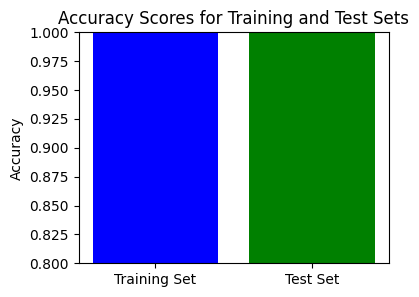

In [34]:
# Creating bar plot
plt.figure(figsize=(4, 3))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Scores for Training and Test Sets')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.show()